In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder='desktop/crem'
os.listdir(folder)

['Marché solaire 2016.pdf',
 '.DS_Store',
 'IDC_canton_geneve_2010.xlsx',
 'indice_moyen.csv',
 'logo_CREM.png',
 'Textes législatifs',
 '~$TILS INFORMATIQUES.docx',
 'LEne - Canton de VAUD.docx',
 'assurance_suisse_2.tif',
 'assurance_suisse_1.tif',
 'Documents',
 'cheat-python.pdf',
 'Cours_analyse_de_corrélation.pdf',
 'Data',
 'Raw Data']

In [3]:
df=pd.read_excel(os.path.join(folder,'IDC_canton_geneve_2010.xlsx'))
df.describe()

,EGID,IDPADR,NBRE_PRENEUR,COMPTEURS,SOUMIS_AU_CALCUL,SOURCE_CHALEUR,AVANT_93,PARTICIP_EAU_CHAUDE,CALCUL_SAISON,ANNEE,SRE,CONSOM_TOTALE,INDICE,EMISSION_CO2,N
count,1.745900e+05,1.745900e+05,174590.000000,174492.000000,161393.000000,7.300100e+04,174580.000000,174590.000000,174590.000000,174590.000000,174590.000000,1.745900e+05,174590.000000,1.745900e+05,1.099020e+05
mean,8.414185e+06,9.220206e+11,17.800063,0.035383,0.932444,9.238725e+11,0.927953,0.289104,0.889243,2002.306570,1758.532820,9.253245e+05,571.739739,6.221866e+04,1.982107e+07
std,4.541602e+07,9.327990e+10,13.047528,0.184746,0.250983,8.603918e+10,0.258567,0.065420,0.313831,4.990338,1516.107225,8.485763e+05,176.978166,6.039845e+04,2.208032e+06
min,1.000116e+06,1.041425e+08,0.000000,0.000000,0.000000,4.190920e+08,0.000000,0.000000,0.000000,1990.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.011707e+06,9.302250e+11,9.000000,0.000000,1.000000,9.302250e+11,1.000000,0.300000,1.000000,1998.000000,893.000000,4.556520e+05,473.000000,2.946700e+04,2.004112e+07
50%,1.015306e+06,9.302250e+11,15.000000,0.000000,1.000000,9.302250e+11,1.000000,0.300000,1.000000,2003.000000,1507.000000,7.835040e+05,562.000000,5.036800e+04,2.007042e+07
75%,1.026784e+06,9.302250e+11,23.000000,0.000000,1.000000,9.302250e+11,1.000000,0.300000,1.000000,2007.000000,2260.000000,1.197396e+06,656.000000,8.111800e+04,2.009081e+07
max,2.955184e+08,9.912032e+11,200.000000,1.000000,1.000000,9.912032e+11,1.000000,1.000000,1.000000,2010.000000,62374.000000,4.427291e+07,10389.000000,3.231922e+06,2.014031e+07


In [4]:
# Nombre de bâtiments étudiés

len(df['EGID'].unique())

11849

In [5]:
%matplotlib notebook

plt.figure('Évolution moyenne IDC',figsize=(8,5))
df.groupby('ANNEE')['INDICE'].mean().plot(marker='o',alpha=0.5,color='black')

plt.grid(color='xkcd:silver')
plt.ylabel('MJ/m2')

<IPython.core.display.Javascript object>

In [6]:
ev=100*df.groupby(['ANNEE','AGE_ENERGETIQUE'])['CONSOM_TOTALE'].sum()/df.groupby(['ANNEE'])['CONSOM_TOTALE'].sum()

In [7]:

# Cette baisse d'IDC s'explique par: soit un changement d'agent énergétique (meilleur rendement mêmes besoins) soit une rénovation de l'enveloppe (besoins plus faibles) ou bien les deux   


In [8]:
df_ev=ev.reset_index() # transforme Group_by en dataframe
df_ev.head()

,ANNEE,AGE_ENERGETIQUE,CONSOM_TOTALE
0,1990,Gaz,9.293214
1,1990,Mazout,90.706786
2,1991,Gaz,3.297887
3,1991,Mazout,96.702113
4,1992,Gaz,10.979428


In [9]:
n_df=df_ev.pivot(index="ANNEE", columns="AGE_ENERGETIQUE",values='CONSOM_TOTALE')
n_df.fillna(0,inplace=True)
n_df

AGE_ENERGETIQUE,Bois granul�s,Bois plaquettes,CAD (de gaz),CAD (de mazout),CAD (de renouvelable),CADIOM,Electricit�,Gaz,Mazout,Mazout ultra-l�ger,Vente de chaleur � un tiers en [kWh] � 3.6 [MJ / kWh]
ANNEE,,,,,,,,,,,
1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.293214,90.706786,0.000000,0.000000
1991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.297887,96.702113,0.000000,0.000000
1992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.979428,89.020572,0.000000,0.000000
1993,0.000000,0.000000,0.699078,0.000000,0.000000,0.000000,0.000000,12.291422,87.009500,0.000000,0.000000
1994,0.000000,0.000000,2.815391,0.000000,0.000000,0.000000,0.000000,16.823210,80.361399,0.000000,0.000000
1995,0.000000,0.000000,3.216678,0.365146,0.000000,0.000000,0.000000,17.890065,78.528110,0.000000,0.000000
1996,0.000000,0.000000,3.000763,0.301516,0.000000,0.000000,0.002387,19.160522,77.534812,0.000000,0.000000
1997,0.000000,0.000000,5.173102,0.109507,0.000000,0.000000,0.009975,19.059881,75.636584,0.010951,0.000000
1998,0.000000,0.000000,5.115480,0.113896,0.000000,0.000000,0.002352,19.783389,74.973960,0.010922,0.000000


<IPython.core.display.Javascript object>


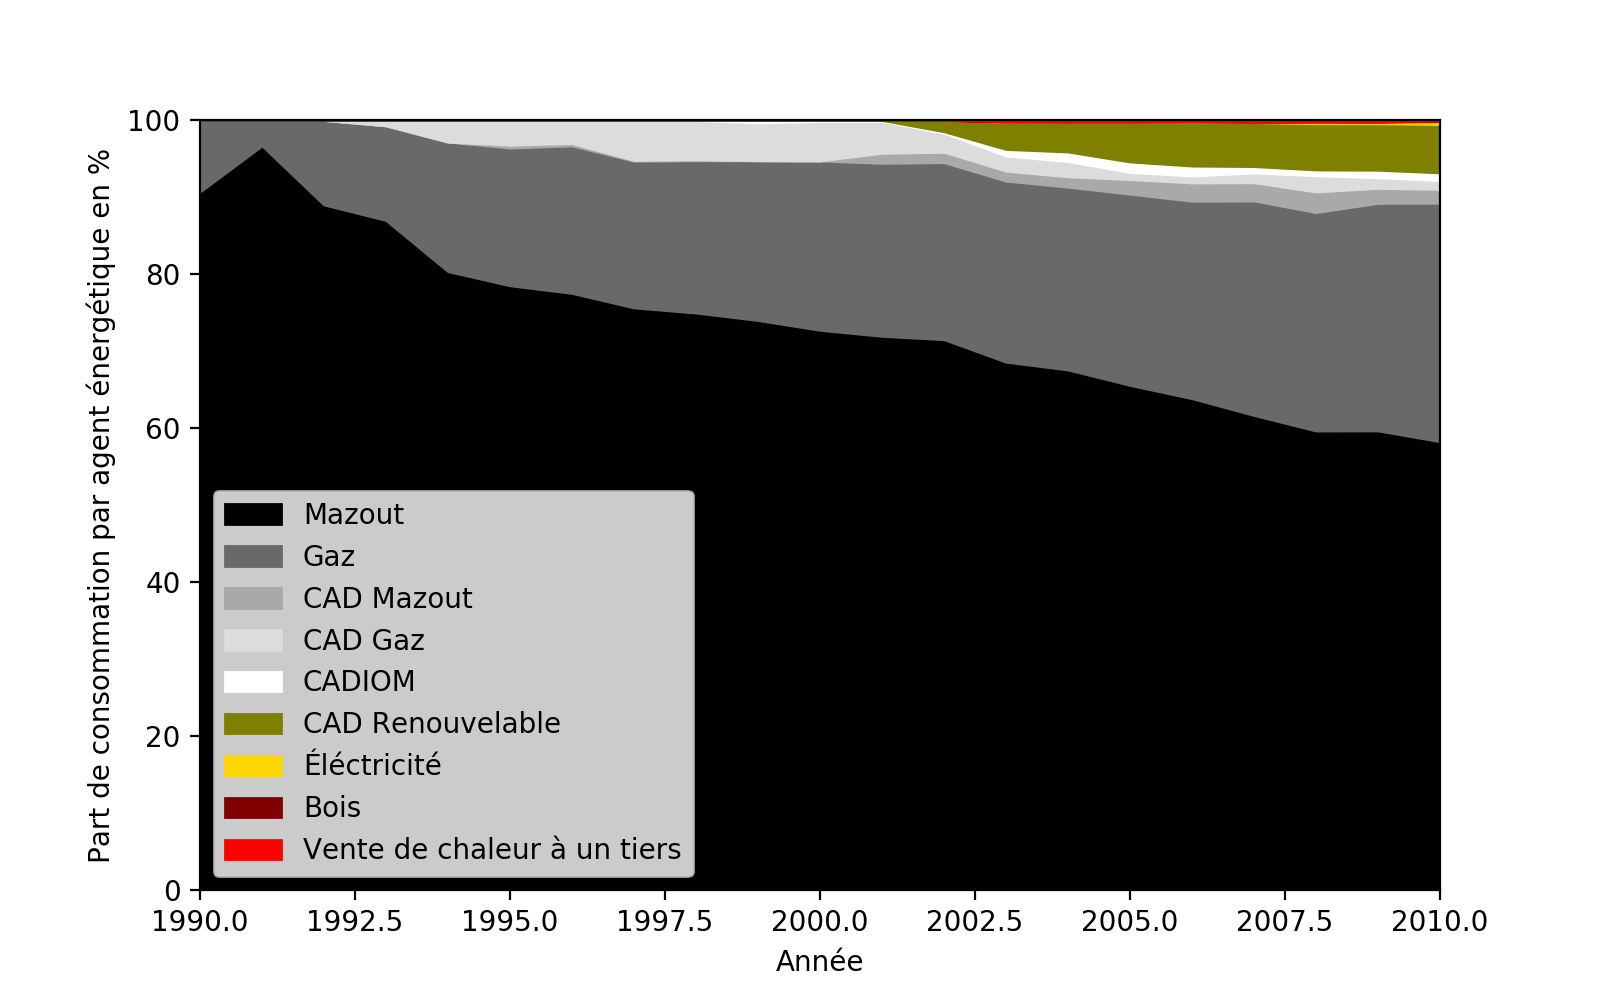

In [17]:
plt.figure('Évolution de la part des agents énergétiques',figsize=(8,5))
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger'],color='black',label='Mazout')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz'],n_df['Mazout']+n_df['Mazout ultra-l�ger'],color='dimgray',label='Gaz')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)'],n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz'],color='darkgrey',label='CAD Mazout')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)'],n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)'],color='gainsboro',label='CAD Gaz')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)'],n_df['Mazout']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)'],color='white',label='CADIOM')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM'],n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)'],color='olive',label='CAD Renouvelable')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM']+n_df['Electricit�'],n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM'],color='gold',label='Éléctricité')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM']+n_df['Electricit�']+n_df['Bois granul�s']+n_df['Bois plaquettes'],n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM']+n_df['Electricit�'],color='maroon',label='Bois')
plt.fill_between(n_df.index,n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM']+n_df['Electricit�']+n_df['Bois granul�s']+n_df['Bois plaquettes']+n_df['Vente de chaleur � un tiers en [kWh] � 3.6 [MJ / kWh]'],n_df['Mazout']+n_df['Mazout ultra-l�ger']+n_df['Gaz']+n_df['CAD (de mazout)']+n_df['CAD (de gaz)']+n_df['CAD (de renouvelable)']+n_df['CADIOM']+n_df['Electricit�']+n_df['Bois granul�s']+n_df['Bois plaquettes'],color='red',label='Vente de chaleur à un tiers')

plt.axis([1990,2010,0,100])
plt.legend(loc=3)
plt.ylabel('Part de consommation par agent énergétique en %')
plt.xlabel('Année')

In [11]:
df.groupby(['AGE_ENERGETIQUE','ANNEE'])['EMISSION_CO2'].sum()

AGE_ENERGETIQUE                                        ANNEE
Bois granul�s                                          2007          5034
                                                       2008         10148
                                                       2009             0
                                                       2010             0
Bois plaquettes                                        2009         26608
                                                       2010         36924
CAD (de gaz)                                           1993       1378511
                                                       1994      12385610
                                                       1995      15457758
                                                       1996      15940099
                                                       1997      27338453
                                                       1998      26893068
                                                   

In [15]:
df1=pd.read_csv(os.path.join(folder,'indice_moyen.csv'))
df1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 12: invalid continuation byte